In [1]:

from pandas import read_csv
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#classedible=e, poisonous=p
#cap-shapebell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
#cap-surfacefibrous=f,grooves=g,scaly=y,smooth=s
#cap-colorbrown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
#bruisesbruises=t,no=f
#odoralmond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
#gill-attachmentattached=a, descending=d, free=f, notched=n
#gill-spacingclose=c,crowded=w,distant=d
#gill-sizebroad=b,narrow=n
#gill-colorblack=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
#stalk-shape
#stalk-root
#stalk-surface-above-ring
#stalk-surface-below-ring
#stalk-color-above-ring
#stalk-color-below-ring
#veil-type
#veil-color
#ring-number
#ring-type
#spore-print-color
#population
#habitat

In [2]:
#Aqui se carga el dataset
def load_dataset(filename):
    #Como un Dataframe
    data = read_csv(filename, header=None)
    #Creamos una matriz con los datos
    dataset = data.values
    #Dividimos en X y y
    X = dataset[:, :-1]
    y = dataset[:,-1]
    #Forzamos el tipo string
    X = X.astype(str)
    return X, y
 
#Entrada, X
def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder()
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train)
    X_test_enc = oe.transform(X_test)
    return X_train_enc, X_test_enc
 
#Salida, y
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc

In [3]:
#Dataset
file = "mushrooms.csv"
X, y = load_dataset(file)

#Se dividen los datos en entrada, X
#salida  y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
#X
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# y
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

#Busqueda de modelo
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_enc, y_train_enc)

#Modelo
yhat = model.predict(X_test_enc)

#Evaluacion del modelo 
accuracy = accuracy_score(y_test_enc, yhat)
print('Accuracy/exactitud: %.2f' % (accuracy*100), '%')

C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the num

Accuracy/exactitud: 65.70 %


C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [4]:
#Características
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k=4)
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    
    for i in range(len(fs.scores_)):
        print('Característica %d: %f' % (i, fs.scores_[i]))
    
    plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
    return X_train_fs, X_test_fs

Característica 0: 173.154595
Característica 1: 171.180576
Característica 2: 186.777001
Característica 3: 1244.375135
Característica 4: 263.195582
Característica 5: 739.509226
Característica 6: 29.900380
Característica 7: 2612.698620
Característica 8: 1907.785340
Característica 9: 2343.125059
Característica 10: 841.024072
Característica 11: 2189.973271
Característica 12: 170.904478
Característica 13: 123.063274
Característica 14: 485.823679
Característica 15: 478.388580
Característica 16: 5442.000000
Característica 17: 60.477230
Característica 18: 463.648893
Característica 19: 1976.065330
Característica 20: 2858.970855
Característica 21: 1126.275798
Accuracy/exactitud: 49.07 %


C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


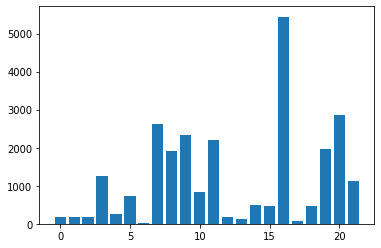

In [5]:
#Dataset
file = "mushrooms.csv"
X, y = load_dataset(file)

#Se dividen los datos en entrada, X
#salida  y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
#X
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
#y
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
#Busqueda de modelo
X_train_fs, X_test_fs = select_features(X_train_enc, y_train_enc, X_test_enc)

#Busqueda de modelo
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_fs, y_train_enc)

#Modelo
yhat = model.predict(X_test_fs)


#Evaluacion del modelo 
accuracy = accuracy_score(y_test_enc, yhat)
print('Accuracy/exactitud: %.2f' % (accuracy*100), '%')

In [6]:
#Características
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=mutual_info_classif, k=4)
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    
    for i in range(len(fs.scores_)):
        print('Característica %d: %f' % (i, fs.scores_[i]))
    
    plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
    return X_train_fs, X_test_fs

Característica 0: 0.105097
Característica 1: 0.119645
Característica 2: 0.117370
Característica 3: 0.331609
Característica 4: 0.192828
Característica 5: 0.329084
Característica 6: 0.054240
Característica 7: 0.150478
Característica 8: 0.143085
Característica 9: 0.440049
Característica 10: 0.106094
Característica 11: 0.467342
Característica 12: 0.149956
Característica 13: 0.139118
Característica 14: 0.304845
Característica 15: 0.303331
Característica 16: 0.002471
Característica 17: 0.070351
Característica 18: 0.105734
Característica 19: 0.199232
Característica 20: 0.309172
Característica 21: 0.426976
Accuracy/exactitud: 56.56 %


C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


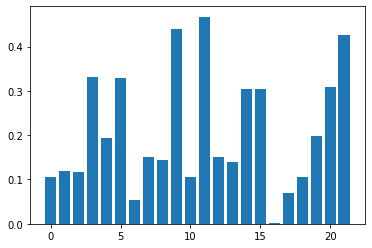

In [7]:

#Dataset
file = "mushrooms.csv"
X, y = load_dataset(file)

#Se dividen los datos en entrada, X
#salida  y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
#X
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
#y
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
#Características
X_train_fs, X_test_fs = select_features(X_train_enc, y_train_enc, X_test_enc)

#Busqueda delmodelo
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_fs, y_train_enc)

#Modelo Encotnrado
yhat = model.predict(X_test_fs)

#Evaluacion modelo 
accuracy = accuracy_score(y_test_enc, yhat)
print('Accuracy/exactitud: %.2f' % (accuracy*100), '%')